##Authors Michael Bednar, Tyler Stephens, Ruth Kanyinda, Bigyan Bhandari

##Dataset description
Dataset National Center for Education Statistics ```https://nces.ed.gov/ccd/files.asp```
1. This dataset for increasing the availibility and openess of the United States and The primary purpose of the CCD is to provide basic information on public elementary and secondary schools, local education agencies (LEAs), and state education agencies (SEAs) for each state, the District of Columbia, and the outlying territories with a U.S. relationship.
2. The data is generated by merging available data in the Common Core of Data (CCD) website using its table generator tool. We select the school's name, number of total students in the school, the number of students receiving FRPL and the racial composition of the student population. 
3.For the data to be modeled, we found it necessary to clean and format the data. There were non-numerical values in numerical fields that we had to replace with appropriate values or drop from our data altogether. There was also data for inactive schools that would only add noise to our data and as such we decided to drop those inactive schools from our data. The absence of such schools should not impact any of our models or the outcomes of the models. 
4. This specific dataset is from the years 91-96 in the State of Texas individual high schools includes the school and agency ID, location of the school, the number of total students enrolled, number of students eligible for free lunch, the racial background of the various students. Lastly the number of full time teachers working for the school.

## Goals
## Use the given dataset to evaluate the what values we should use the district wide dataset to try and determine a schools tile 1 eligibility. By using these main predictors we plan on being to evaluate wether or not the given school qualifies as a Title one school district. 

First we must clean the dataset and see what data we have at our desposal

Second we must determine how the data correlates and determine whether or not the data will be useful for determining a schools poverty level and whether or not it is title 1 eligible. 

We are going to choose our indicators in this data set using Free Lunches per total studetns because in 91-96 data set there's not title 1 eligibility so we are going to assume that the best indicator in our current data set for poverty in a school will be free lunches.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('91-96_FT.csv')
df.head()

School Name  ... Full-Time Equivalent (FTE) Teachers [Public School] 1991-92
0  6TH GRADE CENTER  ...                                               46.8         
1    A & M CONS H S  ...                                               88.8         
2     A B DUNCAN EL  ...                                                 26         
3      A B MCBAY EL  ...                                                 42         
4  A C BLUNT MIDDLE  ...                                               34.3         

[5 rows x 49 columns]

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6934 entries, 0 to 6933
Data columns (total 49 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   School Name                                                       6934 non-null   object 
 1   State Name [Public School] Latest available year                  6934 non-null   object 
 2   School ID - NCES Assigned [Public School] Latest available year   6934 non-null   float64
 3   Agency ID - NCES Assigned [Public School] Latest available year   6934 non-null   int64  
 4   Locale [Public School] 1995-96                                    6934 non-null   object 
 5   Locale [Public School] 1994-95                                    6934 non-null   object 
 6   Locale [Public School] 1993-94                                    6934 non-null   object 
 7   Locale [Public School] 1992-93   

In [ ]:
#df = df.replace(regex=['†'], value=0)
#df = df.replace(regex=['–'], value=0)
df = df.replace(regex=['†'], value=np.nan)
df = df.replace(regex=['–'], value=np.nan)
df = df.replace(regex=['1-Large city'], value=1)
df = df.replace(regex=['2-Midsize city'], value=2)
df = df.replace(regex=['3-Urban fringe of large city'], value=3)
df = df.replace(regex=['4-Urban fringe of midsize city'], value=4)
df = df.replace(regex=['5-Large town'], value=5)
df = df.replace(regex=['6-Small town'], value=6)
df = df.replace(regex=['7-Rural - outside CBSA/MSA'], value=7)
#df = df.replace(regex=['School ID - NCES Assigned [Public School] Latest available year'], value='School_ID')
#df = df.replace(regex=['Agency ID - NCES Assigned [Public School] Latest available year'], value='Agency_ID')
#df = df.drop(['State Name [Public School] Latest available year'], axis=1)
df.isna().sum()
df.dropna(inplace=True)
df.head()

School Name  ... Full-Time Equivalent (FTE) Teachers [Public School] 1991-92
1    A & M CONS H S  ...                                               88.8         
2     A B DUNCAN EL  ...                                                 26         
3      A B MCBAY EL  ...                                                 42         
4  A C BLUNT MIDDLE  ...                                               34.3         
9     A C JONES H S  ...                                               80.6         

[5 rows x 49 columns]

In [ ]:
#df_Totals = df['School Name', 'School ID - NCES Assigned [Public School] Latest available year', 'Agency ID - NCES Assigned [Public School] Latest available year']
df_Totals = pd.DataFrame()
df_Totals['School_Name'] = df['School Name']
df_Totals['School_ID'] = df['School ID - NCES Assigned [Public School] Latest available year']
df_Totals['Agency_ID'] = df['Agency ID - NCES Assigned [Public School] Latest available year']
df_Totals.head()

School_Name     School_ID  Agency_ID
1    A & M CONS H S  4.810000e+11    4807350
2     A B DUNCAN EL  4.820000e+11    4819440
3      A B MCBAY EL  4.830000e+11    4830420
4  A C BLUNT MIDDLE  4.810000e+11    4808580
9     A C JONES H S  4.810000e+11    4809720

In [ ]:
Total_Students = df.iloc[:,[9,10,11,12,13]].astype(int)
df_Totals['Total_Students'] = Total_Students.sum(axis=1)
df_Totals['Avg_Students'] = Total_Students.sum(axis=1)/5
df_Totals.head()

School_Name     School_ID  Agency_ID  Total_Students  Avg_Students
1    A & M CONS H S  4.810000e+11    4807350            7922        1584.4
2     A B DUNCAN EL  4.820000e+11    4819440            2022         404.4
3      A B MCBAY EL  4.830000e+11    4830420            3823         764.6
4  A C BLUNT MIDDLE  4.810000e+11    4808580            2556         511.2
9     A C JONES H S  4.810000e+11    4809720            5829        1165.8

In [ ]:
Locale = df.iloc[:,[4,5,6,7,8]].sum(axis=1)
#print(Locale)
#Total_Students = df.iloc[:,[9,10,11,12,13]]
Free_Lunch = df.iloc[:,[14,15,16,17,18]].astype(int).sum(axis=1)
Native_American = df.iloc[:,[19,20,21,22,23]].astype(int).sum(axis=1)
Asian_American = df.iloc[:,[24,25,26,27,28]].astype(int).sum(axis=1)
Hispanic_American = df.iloc[:,[29,30,31,32,33]].astype(int).sum(axis=1)
African_American = df.iloc[:,[34,35,36,37,38]].astype(int).sum(axis=1)
Caucasian_American = df.iloc[:,[39,40,41,42,43]].astype(int).sum(axis=1)
FTE_Teacher = df.iloc[:,[44,45,46,47,48]].astype(float).sum(axis=1)
Avg_FTE_Teacher = FTE_Teacher/5

df_Totals['Locale'] = Locale
df_Totals['Avg_Locale'] = Locale/5
df_Totals['Free_Lunch'] = Free_Lunch
df_Totals['Avg_Free_Lunch'] = Free_Lunch/5
df_Totals['Native_American'] = Native_American
df_Totals['Avg_Native_American'] = Native_American/5
df_Totals['%_NA'] = df_Totals['Native_American']/df_Totals['Total_Students'] 
df_Totals['Asian_American'] = Asian_American
df_Totals['Avg_Asian_American'] = Asian_American/5
df_Totals['%_AsA'] = df_Totals['Asian_American']/df_Totals['Total_Students']
df_Totals['Hispanic_American'] = Hispanic_American
df_Totals['Avg_Hispanic_American'] = Hispanic_American/5
df_Totals['%_HA'] = df_Totals['Hispanic_American']/df_Totals['Total_Students']
df_Totals['African_American'] = African_American
df_Totals['Avg_African_American'] = African_American/5
df_Totals['%_AfA'] = df_Totals['African_American']/df_Totals['Total_Students']
df_Totals['Caucasian_American'] = Caucasian_American
df_Totals['Avg_Caucasian_American'] = Caucasian_American/5
df_Totals['%_CA'] = df_Totals['Caucasian_American']/df_Totals['Total_Students']
df_Totals['FTE_Totals'] = FTE_Teacher
df_Totals['Avg_FTE_Totals'] = Avg_FTE_Teacher/5
df_Totals['FL_per_TS'] = df_Totals['Free_Lunch']/df_Totals['Total_Students']
#df_Totals['FL_per_TS'] = df_Totals['Avg_Free_Lunch']/df_Totals['Avg_Students']
df_Totals.head()

School_Name     School_ID  ...  Avg_FTE_Totals  FL_per_TS
1    A & M CONS H S  4.810000e+11  ...          19.360   0.100480
2     A B DUNCAN EL  4.820000e+11  ...           5.304   0.696340
3      A B MCBAY EL  4.830000e+11  ...           8.900   0.571802
4  A C BLUNT MIDDLE  4.810000e+11  ...           7.120   0.528951
9     A C JONES H S  4.810000e+11  ...          16.092   0.436438

[5 rows x 27 columns]

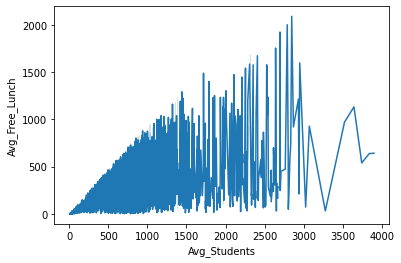

In [ ]:
sns.lineplot(data=df_Totals, x='Avg_Students', y='Avg_Free_Lunch')

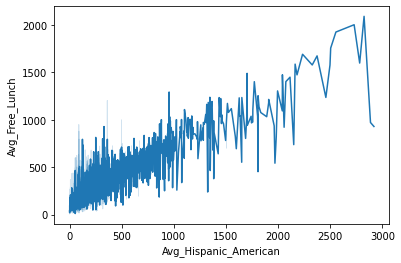

In [ ]:
sns.lineplot(data=df_Totals, x='Avg_Hispanic_American', y='Avg_Free_Lunch')

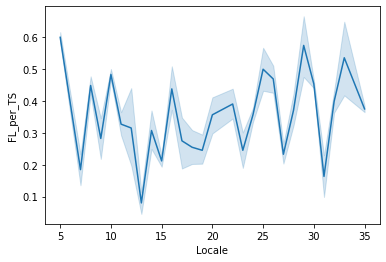

In [ ]:
sns.lineplot(data=df_Totals, x='Locale', y='FL_per_TS')

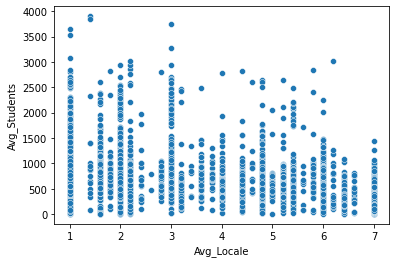

In [ ]:
sns.scatterplot(data=df_Totals, x='Avg_Locale', y='Avg_Students')
#df_Totals.iloc[499:999].plot(x='Locale', y='Total_Students')

In [ ]:
df_Totals = df_Totals.sort_values(by=['Avg_Students'], ascending=False)
df_Totals.head()

School_Name     School_ID  ...  Avg_FTE_Totals  FL_per_TS
2013     ELSIK H S  4.810000e+11  ...          43.176   0.164838
2727  HASTINGS H S  4.810000e+11  ...          41.948   0.166406
3320    JUDSON H S  4.820000e+11  ...          46.252   0.144368
5739   SKYLINE H S  4.820000e+11  ...          45.744   0.310820
4260     MILBY H S  4.820000e+11  ...          35.124   0.275570

[5 rows x 27 columns]

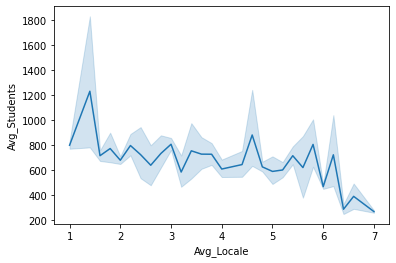

In [ ]:
sns.lineplot(data=df_Totals, x='Avg_Locale', y='Avg_Students')

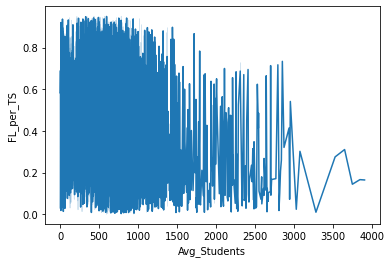

In [ ]:
sns.lineplot(data=df_Totals, x='Avg_Students', y='FL_per_TS')

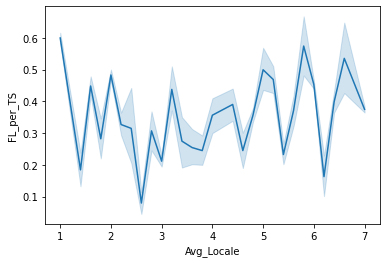

In [ ]:
sns.lineplot(data=df_Totals, x='Avg_Locale', y='FL_per_TS')

In [ ]:
df_Totals = df_Totals.drop(['Total_Students'], axis=1)
df_Totals = df_Totals.drop(['Locale'], axis=1)
df_Totals = df_Totals.drop(['Free_Lunch'], axis=1)
df_Totals = df_Totals.drop(['Native_American'], axis=1)
df_Totals = df_Totals.drop(['Asian_American'], axis=1)
df_Totals = df_Totals.drop(['Hispanic_American'], axis=1)
df_Totals = df_Totals.drop(['African_American'], axis=1)
df_Totals = df_Totals.drop(['Caucasian_American'], axis=1)
df_Totals = df_Totals.drop(['FTE_Totals'], axis=1)
df_Totals.head()

School_Name     School_ID  ...  Avg_FTE_Totals  FL_per_TS
2013     ELSIK H S  4.810000e+11  ...          43.176   0.164838
2727  HASTINGS H S  4.810000e+11  ...          41.948   0.166406
3320    JUDSON H S  4.820000e+11  ...          46.252   0.144368
5739   SKYLINE H S  4.820000e+11  ...          45.744   0.310820
4260     MILBY H S  4.820000e+11  ...          35.124   0.275570

[5 rows x 18 columns]

So from the heatmap it was observed that the Percentage of Hispanic Students  column is in most positive correlation for Free Lunch per Total Students while the Percentage of Caucasian Students column is in most negative correlation with the Free Lunch per Total Students column. We also learn that there are so little Native American and Asian american students on average enrolled in Texas High schools that their data doesn't really give us any useful information. Nor does the Location and Total number of Students of the school because there is too much variation in the data.

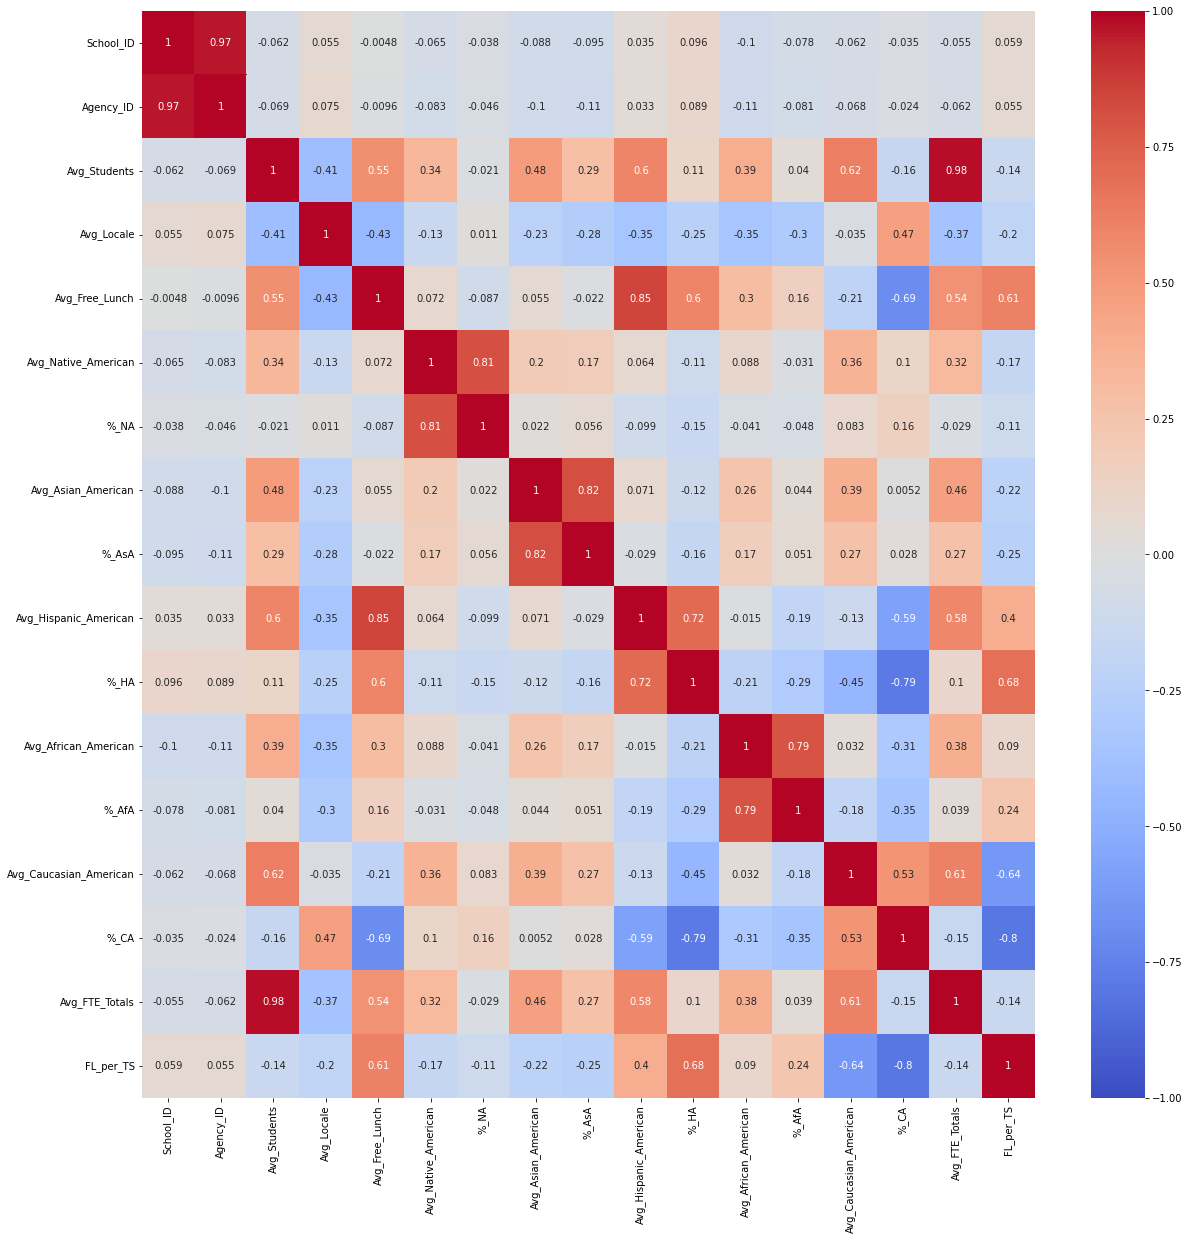

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df_Totals.corr(),annot=True,cmap='coolwarm',vmin=-1)

As we can see from the scatterplot below we can see that while there is a linear-ish upward trend there are certainly a lot of outliers.

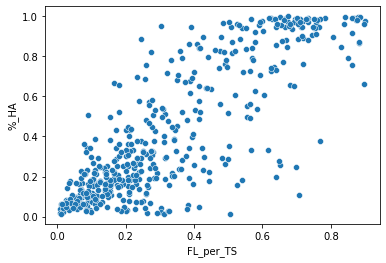

In [ ]:
sns.scatterplot(data=df_Totals.iloc[0:499], x="FL_per_TS", y="%_HA")

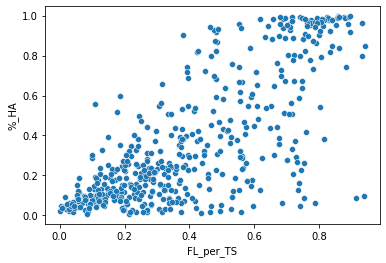

In [ ]:
sns.scatterplot(data=df_Totals.iloc[499:999], x="FL_per_TS", y="%_HA")

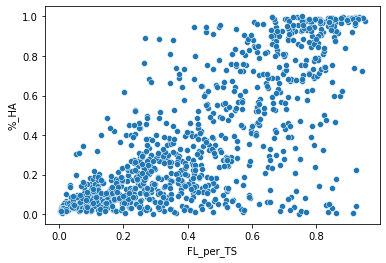

In [ ]:
sns.scatterplot(data=df_Totals.iloc[999:1999], x="FL_per_TS", y="%_HA")

As we can see from the scatterplot below we can see that while there is a linear-ish downward with few outliers.

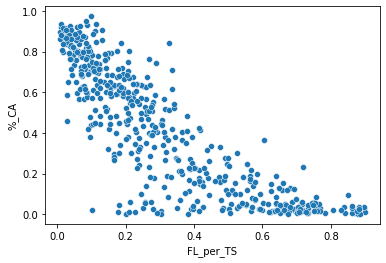

In [ ]:
sns.scatterplot(data=df_Totals.iloc[0:499], x="FL_per_TS", y="%_CA")

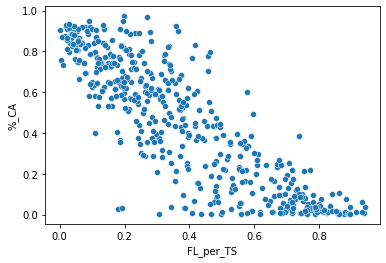

In [ ]:
sns.scatterplot(data=df_Totals.iloc[499:999], x="FL_per_TS", y="%_CA")

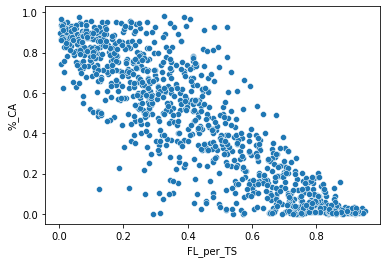

In [ ]:
sns.scatterplot(data=df_Totals.iloc[999:1999], x="FL_per_TS", y="%_CA")

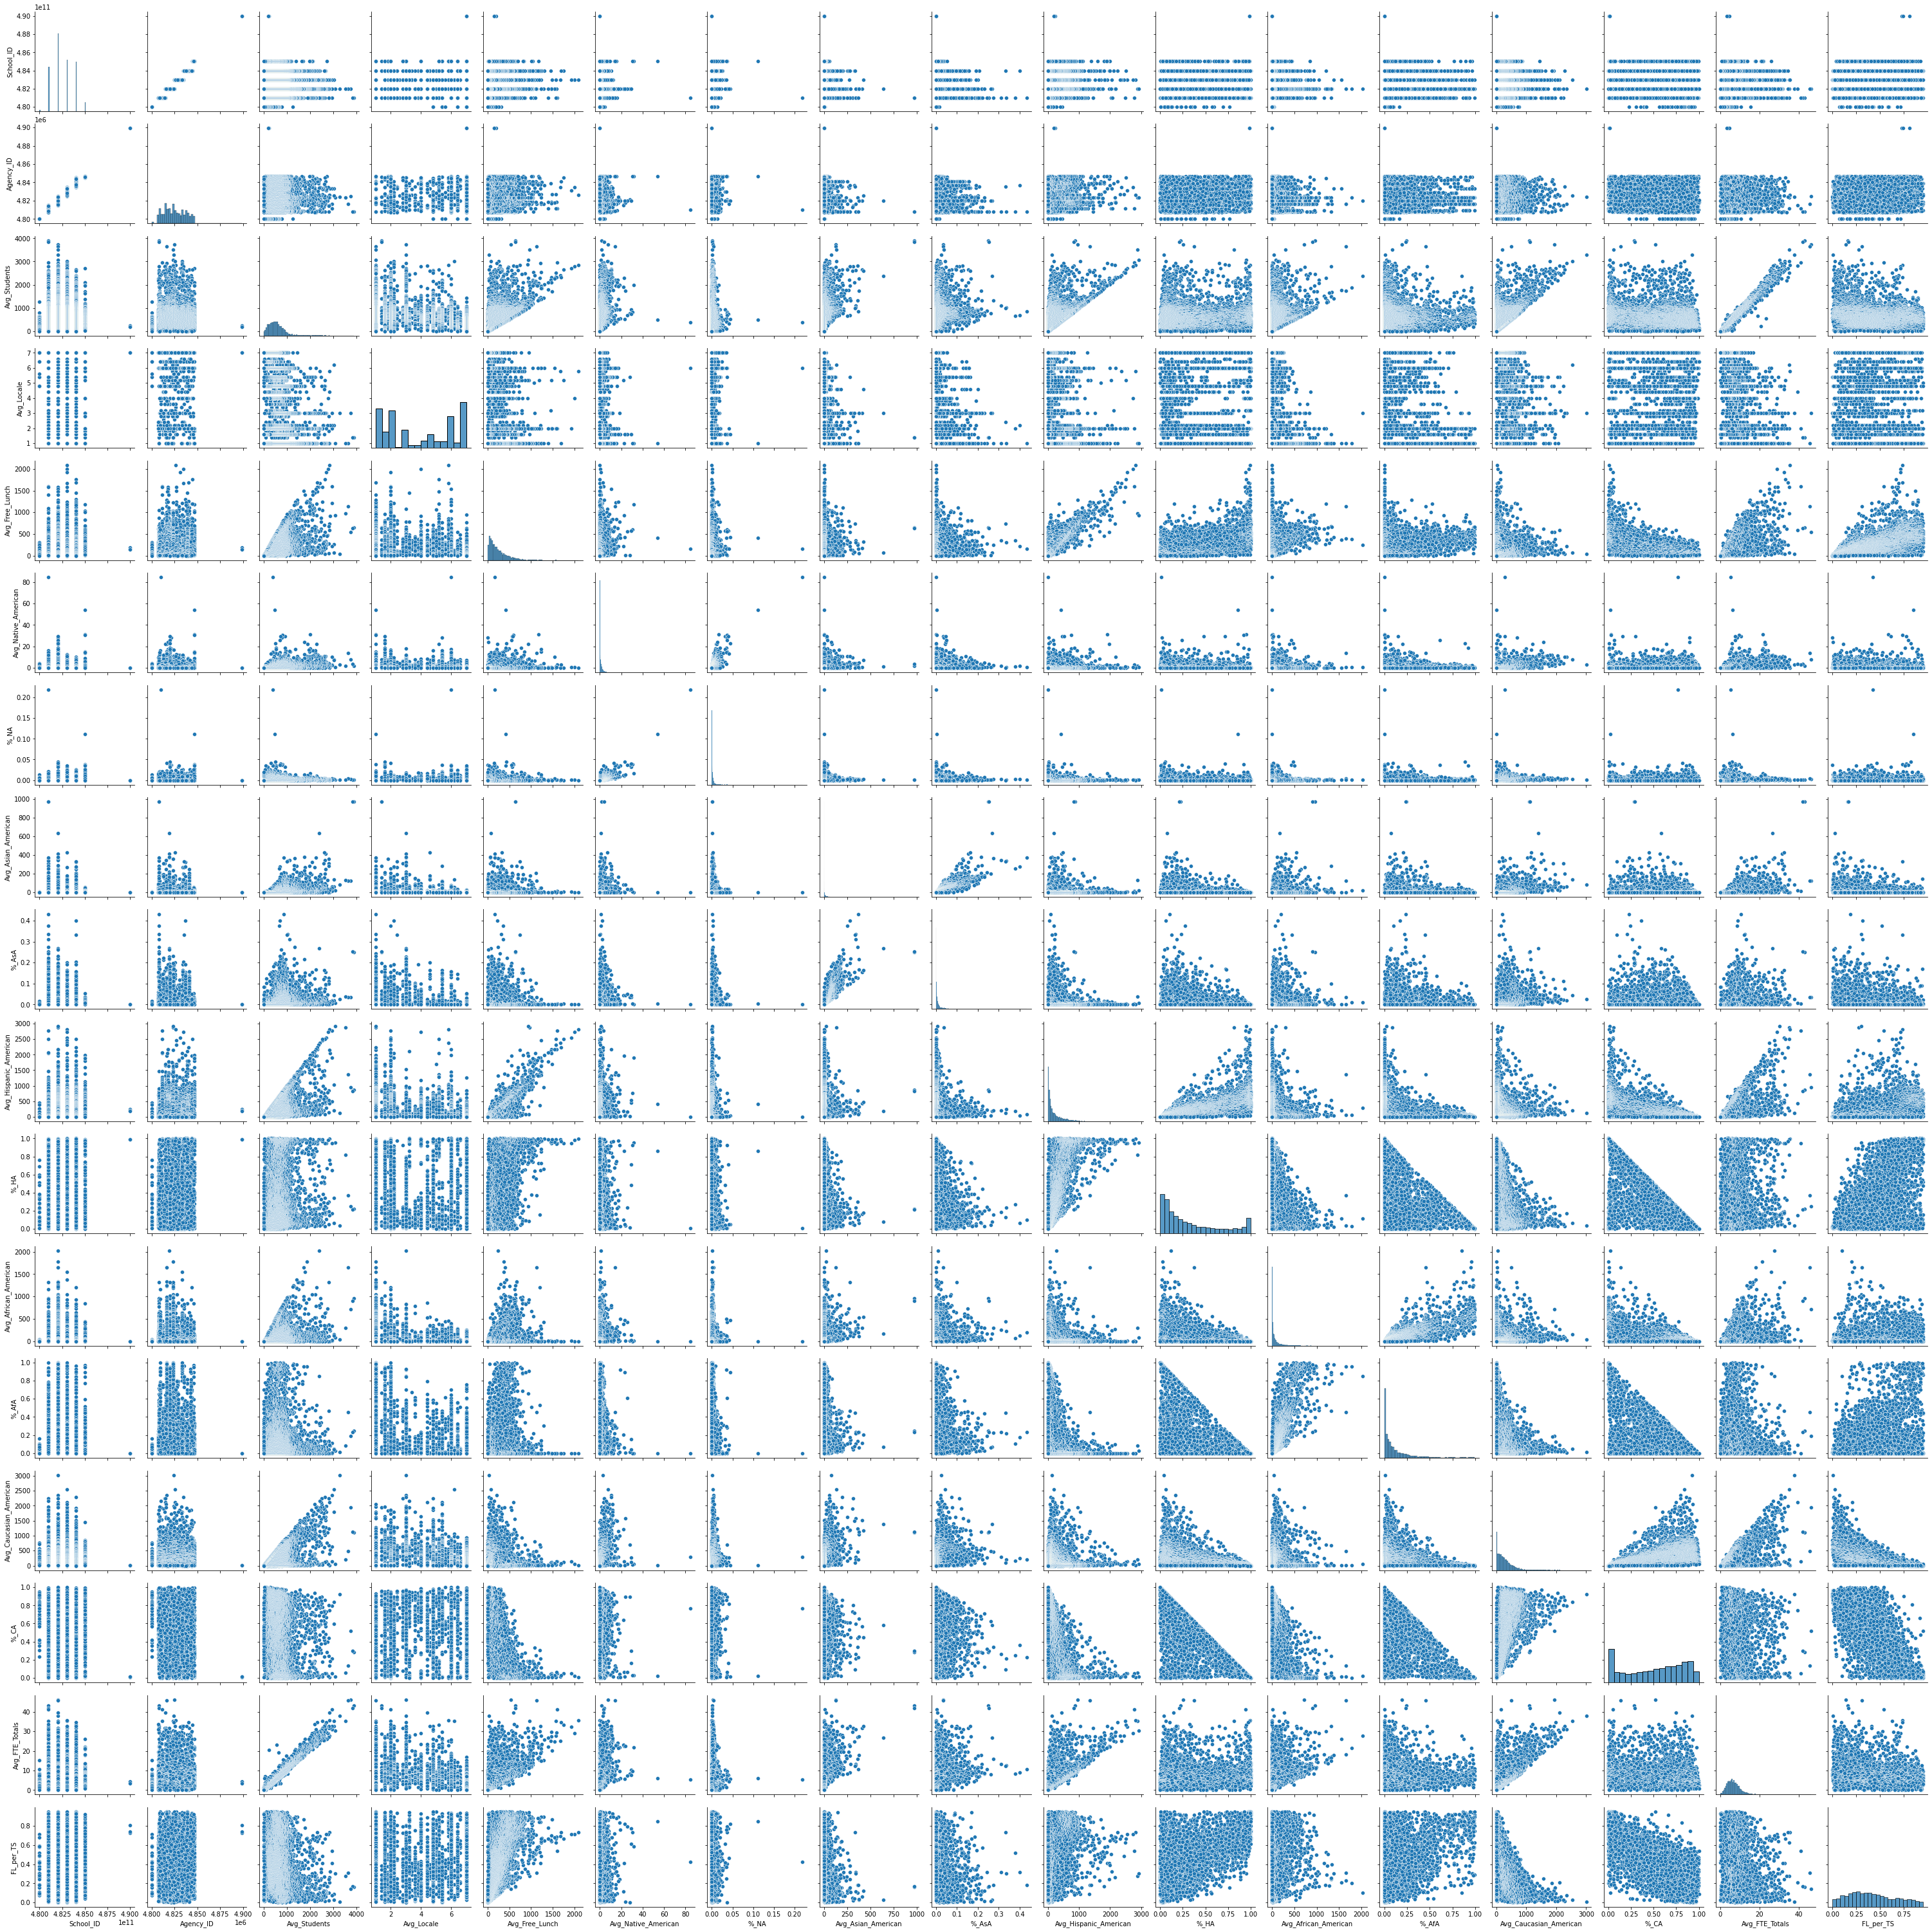

In [ ]:
sns.pairplot(df_Totals)